In [3]:
import pandas as pd
import seaborn as sns


# Intro to the Olympic Medal Winner dataset


In [4]:
#Import the CSV and preview the dataset
#Link to CSV download source: https://www.theguardian.com/sport/datablog/2012/jun/25/olympic-medal-winner-list-data
#Dataset with Olympic medal winners since 1896 stored in a dataframe called oo
oo=pd.read_csv('olympics.csv', skiprows=4)
oo.head(10)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver
5,Athens,1896,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,1200m freestyle,M,Bronze
6,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200m freestyle,M,Gold
7,Athens,1896,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200m freestyle,M,Silver
8,Athens,1896,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,400m freestyle,M,Bronze
9,Athens,1896,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400m freestyle,M,Gold


# Basic Plotting

## Plot the number of medals achieved by the Chinese team, (both men and women), in Beijing 2008 using Matplotlib and Seaborn

In [5]:
#chn08 will be the dataframe with all Chinese medal winners for 2008 Edition
chn08=oo[(oo.NOC=='CHN')&(oo.Edition==2008)]
#Preview to see that chn08 is correct
chn08.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
27176,Beijing,2008,Aquatics,Diving,"ZHOU, Luxin",CHN,Men,10m platform,M,Silver
27177,Beijing,2008,Aquatics,Diving,"WANG, Xin",CHN,Women,10m platform,W,Bronze
27178,Beijing,2008,Aquatics,Diving,"CHEN, Ruolin",CHN,Women,10m platform,W,Gold
27180,Beijing,2008,Aquatics,Diving,"QIN, Kai",CHN,Men,3m springboard,M,Bronze
27181,Beijing,2008,Aquatics,Diving,"HE, Chong",CHN,Men,3m springboard,M,Gold


In [6]:
#Using Matplotlib

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

### 2008 Beijing Olympics Chinese Medal Winners by gender

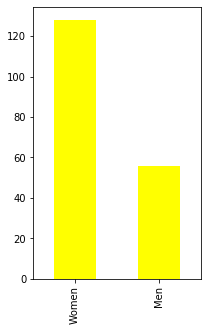

In [8]:
chn08.Gender.value_counts().plot(kind='bar', figsize=(3,5), color='yellow');

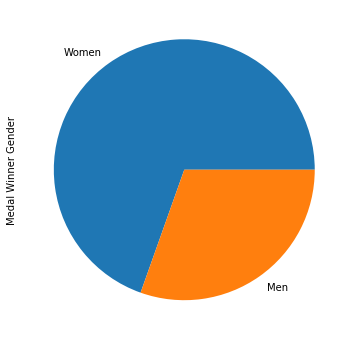

In [9]:
chn08.Gender.value_counts().plot(kind='pie', figsize=(6,6), label="Medal Winner Gender");

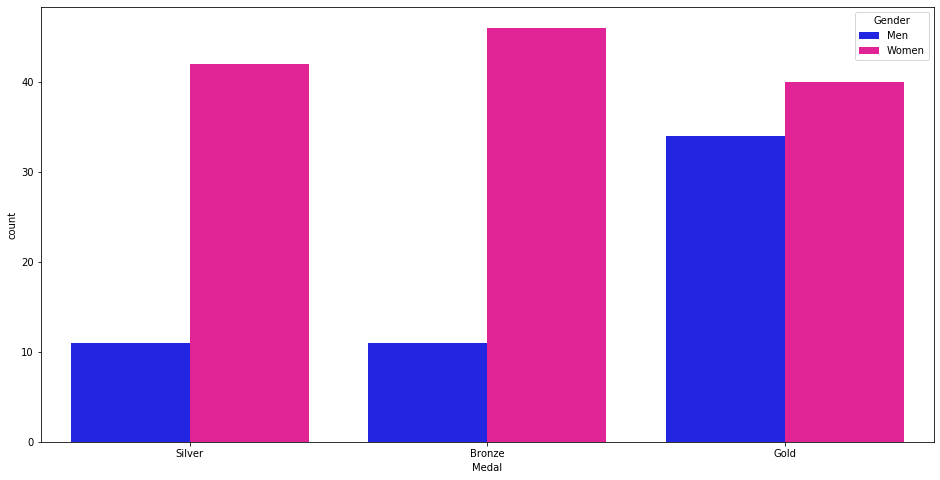

In [10]:
#Using Seaborn
#Array with colours for gender as hue
gender_colors = ["#0408FF", "#FF049b"]
# Set custom color palette
sns.set_palette(sns.color_palette(gender_colors))
plt.figure(figsize=(16,8))
sns.countplot(x='Medal', data=chn08, hue='Gender');

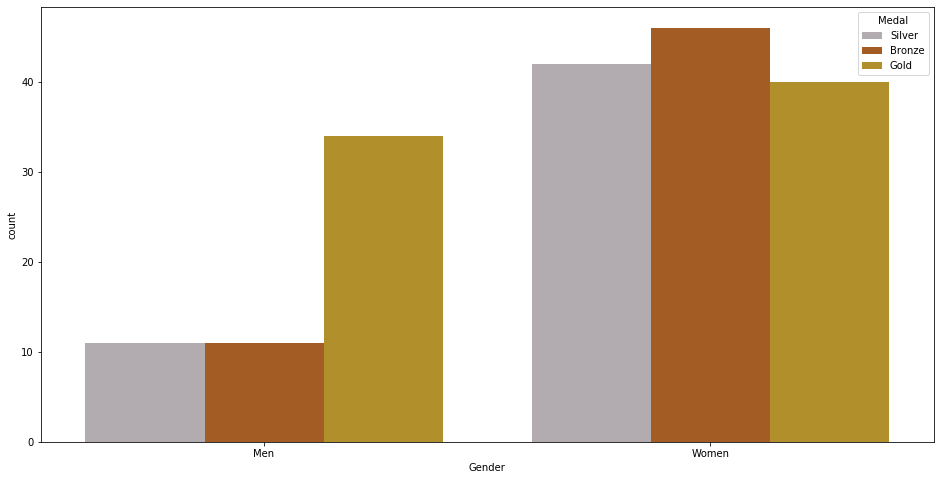

In [11]:
#Array with colours to represent different medals
medal_colors = ["#b3aaaf", "#b85b0f","#c79b16"]
# Set custom color palette
sns.set_palette(sns.color_palette(medal_colors ))
plt.figure(figsize=(16,8))
sns.countplot(x='Gender', data=chn08, hue='Medal');

## Plot the total number of medals awarded at each of the Olympic games throughout history

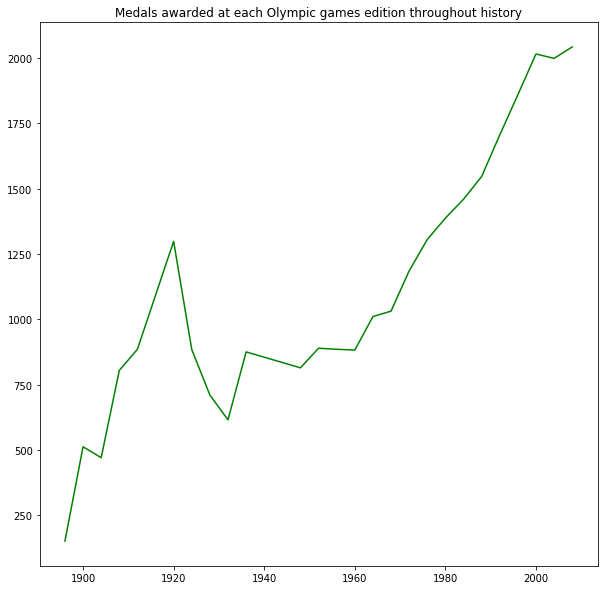

In [12]:
plt.xlabel="Edition"
total_medals=oo.Edition.value_counts().sort_index().plot(kind='line', figsize=(10,10), color='green', title="Medals awarded at each Olympic games edition throughout history");

## Which countries did not win a medal in the 2008 Olympics ?

In [34]:
#Winners08 is a dataset storing all countries that did win medals in 2008:
Winners08=oo[oo.Edition==2008]
#Preview
Winners08.head(10)
#See which countries won medals by NOC code and store in a series
Winners08=Winners08.NOC.value_counts()
Winners08

USA    315
CHN    184
AUS    149
RUS    143
GER    101
      ... 
ECU      1
VIE      1
RSA      1
CHI      1
PAN      1
Name: NOC, Length: 86, dtype: int64

In [18]:
#Import a full list of all countries, so we can compare winners from 2008, store in cc dataframe:
cc=pd.read_csv('country_codes.csv')
#Preview
cc


,Country,Int Olympic Committee code,ISO code,Country.1
0,Afghanistan,AFG,AF,Afghanistan
1,Albania,ALB,AL,Albania
2,Algeria,ALG,DZ,Algeria
3,American Samoa*,ASA,AS,American Samoa*
4,Andorra,AND,AD,Andorra
...,...,...,...,...
196,Vietnam,VIE,VN,Vietnam
197,Virgin Islands*,ISV,VI,Virgin Islands*
198,Yemen,YEM,YE,Yemen
199,Zambia,ZAM,ZM,Zambia


In [19]:
#What is the difference between Country and Country.1 colums ?
cc[cc['Country']!=cc['Country.1']]


,Country,Int Olympic Committee code,ISO code,Country.1


In [20]:
#empty dataset returned, infer there is no difference

In [27]:
#Index cc by country codes and preview
cc.set_index('Int Olympic Committee code', inplace=True)

,Country,ISO code,Country.1
Int Olympic Committee code,,,
AFG,Afghanistan,AF,Afghanistan
ALB,Albania,AL,Albania
ALG,Algeria,DZ,Algeria
ASA,American Samoa*,AS,American Samoa*
AND,Andorra,AD,Andorra
...,...,...,...
VIE,Vietnam,VN,Vietnam
ISV,Virgin Islands*,VI,Virgin Islands*
YEM,Yemen,YE,Yemen


In [30]:
#Attach Winners08 series to cc dataframe
cc['Win08']=Winners08

In [32]:
#Find countries that did not win a medal
cc[cc['Win08'].isnull()]

,Country,ISO code,Country.1,Win08
Int Olympic Committee code,,,,
ALB,Albania,AL,Albania,NaN
ASA,American Samoa*,AS,American Samoa*,NaN
AND,Andorra,AD,Andorra,NaN
ANG,Angola,AO,Angola,NaN
ANT,Antigua and Barbuda,AG,Antigua and Barbuda,NaN
...,...,...,...,...
URU,Uruguay,UY,Uruguay,NaN
VAN,Vanuatu,VU,Vanuatu,NaN
ISV,Virgin Islands*,VI,Virgin Islands*,NaN


## Using groupby, plot the total number of medals awarded at each of the Olympic games throughout history

In [39]:
#View the number of medals for each olympics edition
oo.groupby('Edition').size()

Edition
1896     151
1900     512
1904     470
1908     804
1912     885
1920    1298
1924     884
1928     710
1932     615
1936     875
1948     814
1952     889
1956     885
1960     882
1964    1010
1968    1031
1972    1185
1976    1305
1980    1387
1984    1459
1988    1546
1992    1705
1996    1859
2000    2015
2004    1998
2008    2042
dtype: int64

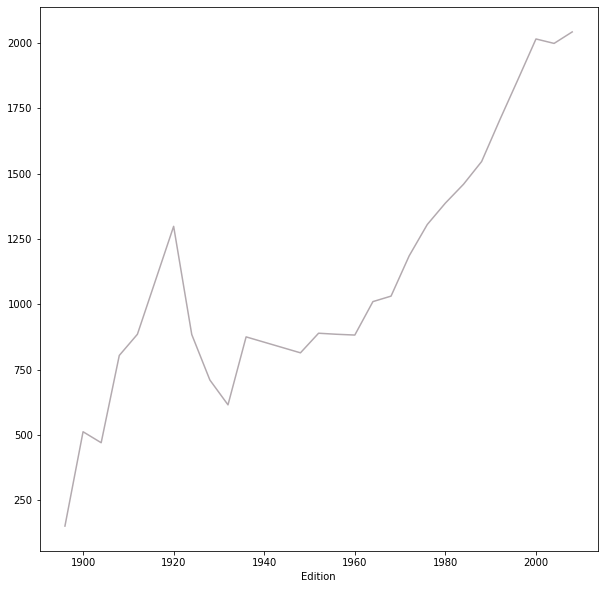

In [43]:
oo.groupby(['Edition']).size().plot(kind='line', figsize=(10,10))

## Create a list showing the total number of medals won for each country over the history of the Olympics. For each country, include the year of the first and the most recent Olympic medal wins.

In [46]:
#Group by country, use min and max function for editions to see first and most recent
oo.groupby(['NOC']).agg({'Edition':['min','max','count']})

Edition            
        min   max count
NOC                    
AFG    2008  2008     1
AHO    1988  1988     1
ALG    1984  2008    14
ANZ    1908  1912    29
ARG    1924  2008   239
..      ...   ...   ...
VIE    2000  2008     2
YUG    1924  2000   435
ZAM    1984  1996     2
ZIM    1980  2008    23
ZZX    1896  1904    48

[138 rows x 3 columns]

## Plot the number of gold medals won by the USA male and female athletes throughout the history of the Olympics.

In [56]:
usa_gold=oo[(oo.NOC=='USA')&(oo.Medal=='Gold')] #Store USA GoldMedal winners in usa dataframe and preview
usa_gold.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
13,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,100m,M,Gold
15,Athens,1896,Athletics,Athletics,"CURTIS, Thomas",USA,Men,110m hurdles,M,Gold
21,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,400m,M,Gold
27,Athens,1896,Athletics,Athletics,"GARRETT, Robert",USA,Men,discus throw,M,Gold
29,Athens,1896,Athletics,Athletics,"CLARK, Ellery",USA,Men,high jump,M,Gold


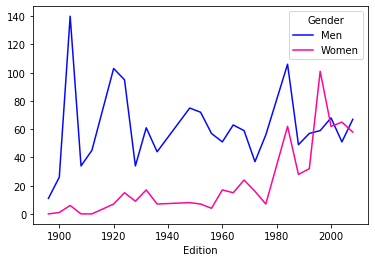

In [60]:
#Group by gender and edition, then unstack and plot
#Array with colours to represent different genders
medal_colors = ["#0408FF", "#FF049b"]
# Set custom color palette
sns.set_palette(sns.color_palette(medal_colors ))
usa_gold.groupby(['Gender','Edition']).size().unstack('Gender', fill_value=0).plot.line()

## Plot the five athletes who have won the most gold medals over the history of the Olympics. When there is a tie, consider the number of silver medals and then bronze medals

In [61]:
#Group by atheltes and their medals
top5=oo.groupby(['Athlete','Medal'])

In [63]:
#Unstack by medal and preview
top5_by_medal= top5.size().unstack('Medal', fill_value=0)
top5_by_medal

Medal,Bronze,Gold,Silver
Athlete,,,
"AABYE, Edgar",0,1,0
"AALTONEN, Arvo Ossian",2,0,0
"AALTONEN, Paavo Johannes",2,3,0
"AAMODT, Ragnhild",0,1,0
"AANING, Alf Lied",0,0,1
...,...,...,...
"ÖSTERVOLD, Jan Olsen",0,1,0
"ÖSTERVOLD, Kristian Olsen",0,1,0
"ÖSTERVOLD, Ole Olsen",0,1,0


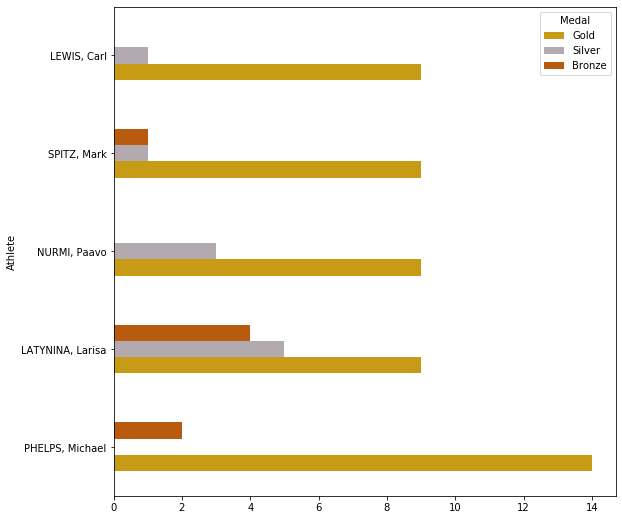

In [71]:

#Array with colours to represent different medals
medal_colors = ["#c79b16","#b3aaaf", "#b85b0f"]
# Set custom color palette
sns.set_palette(sns.color_palette(medal_colors ))#Now sort according to gold, silver, bronze and plot the top 5 only

top5_by_medal.sort_values(['Gold','Silver','Bronze'], ascending=False)[['Gold','Silver','Bronze']].head(5).plot(kind='barh', figsize=(9,9))

##  In every Olympics, which US athlete has won the most total number of medals? Include the athlete's discipline in your solution

In [87]:
#Store US Medal winners in us_medals dataframe
us_medals=oo[oo.NOC=='USA']

In [88]:
us_medals=us_medals.groupby(['Edition','Athlete','Medal']).size().unstack('Medal')

In [90]:
#Now total gold, silver, bronze medals:
us_medals['Total']=us_medals['Gold']+us_medals['Silver']+us_medals['Bronze']
us_medals.reset_index(inplace=True)
tu=[group.sort_values('Total', ascending=False)[:1] for year, group in us_medals.groupby('Edition')]
tu

[Medal  Edition          Athlete  Bronze  Gold  Silver  Total
 3         1896  CONNOLLY, James     1.0   1.0     1.0    3.0,
 Medal  Edition                    Athlete  Bronze  Gold  Silver  Total
 47        1900  TEWKSBURY, Walter B. John     1.0   2.0     2.0    5.0,
 Medal  Edition          Athlete  Bronze  Gold  Silver  Total
 101       1904  DOWNING, Burton     1.0   2.0     3.0    6.0,
 Medal  Edition                 Athlete  Bronze  Gold  Silver  Total
 319       1908  AXTELL, Charles Sumner     NaN   1.0     NaN    NaN,
 Medal  Edition                Athlete  Bronze  Gold  Silver  Total
 421       1912  OSBURN, Carl Townsend     1.0   1.0     2.0    4.0,
 Medal  Edition      Athlete  Bronze  Gold  Silver  Total
 506       1920  LEE, Willis     1.0   5.0     1.0    7.0,
 Medal  Edition         Athlete  Bronze  Gold  Silver  Total
 572       1924  AUSTIN, Arthur     1.0   NaN     NaN    NaN,
 Medal  Edition                   Athlete  Bronze  Gold  Silver  Total
 744       1928  A

In [93]:
#Create a new dataframe to store top athlete for each olympics
top=pd.DataFrame()
for i in tu:
    top=top.append(i)
top

Medal,Edition,Athlete,Bronze,Gold,Silver,Total
3,1896,"CONNOLLY, James",1.0,1.0,1.0,3.0
47,1900,"TEWKSBURY, Walter B. John",1.0,2.0,2.0,5.0
101,1904,"DOWNING, Burton",1.0,2.0,3.0,6.0
319,1908,"AXTELL, Charles Sumner",NaN,1.0,NaN,NaN
421,1912,"OSBURN, Carl Townsend",1.0,1.0,2.0,4.0
506,1920,"LEE, Willis",1.0,5.0,1.0,7.0
572,1924,"AUSTIN, Arthur",1.0,NaN,NaN,NaN
744,1928,"ALDERMAN, Frederick Pitt",NaN,1.0,NaN,NaN
817,1932,"ABLOWICH, Edgar Allen",NaN,1.0,NaN,NaN
978,1936,"ADAM, Gordon Belgum",NaN,1.0,NaN,NaN
